In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import datetime
import numpy as np

In [65]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import holidays
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [173]:
df

,Data,Klient - Nazwa g?ówna,Numer oddzia?u,Produkt,Miejsce za?adunku,dytsans,Delivered Qty,Jednostka miary
0,3/1/2019,LmRxYuMmRLINurzReyzrz,16770434,Produkt 21,Punkt2,134.7338667,15.96,5
1,4/1/2019,kmMyiUiuRYkZgr,16883721,Produkt 25,Punkt5,0,16.80,1
2,4/1/2019,SxLMzxuKRzKgr,16770726,Produkt 25,Punkt5,0,6.53,1
3,3/1/2019,SxLMzxuKRzKgr,16770726,Produkt 25,Punkt5,0,5.60,1
4,4/1/2019,KxRyiUiuSxRPxRKgr,16770412,Produkt 27,Punkt4,0,1.87,1
...,...,...,...,...,...,...,...,...
46615,12/29/2020,ixLyzNNuGNImZNx,16917249,Produkt 27,Punkt2,0,15.87,1
46616,12/29/2020,ixLyzNNuGNImZNx,16917249,Produkt 15,Punkt2,0,30.80,1
46617,12/29/2020,ixLyzNNuGNImZNx,16917249,Produkt 27,Punkt2,0,15.87,1
46618,12/29/2020,kxRPINmXuINxrRxk?zr,16819577,Produkt 27,Punkt2,0,6.53,1


In [174]:
 df.drop(['Klient - Nazwa g?ówna', 'Jednostka miary'], axis=1, inplace=True)

In [175]:
df.rename(columns={'Numer oddzia?u': 'Numer_oddzialu', 'Miejsce za?adunku': 'Miejsce_zaladunku', 'dytsans': 'dystans'}, inplace=True)

In [176]:
df['Data'] = df['Data'].replace('-', np.nan)
df['Data'] = pd.to_datetime(df['Data'], format='mixed', dayfirst=True, errors='coerce') # Use errors='coerce' to turn any unparseable dates into NaT (Not a Time)

In [177]:
df

,Data,Numer_oddzialu,Produkt,Miejsce_zaladunku,dystans,Delivered Qty
0,2019-01-03,16770434,Produkt 21,Punkt2,134.7338667,15.96
1,2019-01-04,16883721,Produkt 25,Punkt5,0,16.80
2,2019-01-04,16770726,Produkt 25,Punkt5,0,6.53
3,2019-01-03,16770726,Produkt 25,Punkt5,0,5.60
4,2019-01-04,16770412,Produkt 27,Punkt4,0,1.87
...,...,...,...,...,...,...
46615,2020-12-29,16917249,Produkt 27,Punkt2,0,15.87
46616,2020-12-29,16917249,Produkt 15,Punkt2,0,30.80
46617,2020-12-29,16917249,Produkt 27,Punkt2,0,15.87
46618,2020-12-29,16819577,Produkt 27,Punkt2,0,6.53


In [178]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46620 entries, 0 to 46619
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Data               46597 non-null  datetime64[ns]
 1   Numer_oddzialu     46620 non-null  int64         
 2   Produkt            46620 non-null  object        
 3   Miejsce_zaladunku  46620 non-null  object        
 4   dystans            46620 non-null  object        
 5   Delivered Qty      46620 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.1+ MB
None


In [179]:
print(df.isnull().sum())

Data                 23
Numer_oddzialu        0
Produkt               0
Miejsce_zaladunku     0
dystans               0
Delivered Qty         0
dtype: int64


In [180]:
df.dropna(subset=['Data'], inplace=True)

In [181]:
df

,Data,Numer_oddzialu,Produkt,Miejsce_zaladunku,dystans,Delivered Qty
0,2019-01-03,16770434,Produkt 21,Punkt2,134.7338667,15.96
1,2019-01-04,16883721,Produkt 25,Punkt5,0,16.80
2,2019-01-04,16770726,Produkt 25,Punkt5,0,6.53
3,2019-01-03,16770726,Produkt 25,Punkt5,0,5.60
4,2019-01-04,16770412,Produkt 27,Punkt4,0,1.87
...,...,...,...,...,...,...
46615,2020-12-29,16917249,Produkt 27,Punkt2,0,15.87
46616,2020-12-29,16917249,Produkt 15,Punkt2,0,30.80
46617,2020-12-29,16917249,Produkt 27,Punkt2,0,15.87
46618,2020-12-29,16819577,Produkt 27,Punkt2,0,6.53


In [182]:
print("Unikalne wartości w kolumnie 'Produkt':", df['Produkt'].nunique())
print("Unikalne wartości w kolumnie 'Miejsce_zaladunku':", df['Miejsce_zaladunku'].nunique())
print("Unikalne wartości w kolumnie 'Numer_oddzialu':", df['Numer_oddzialu'].nunique())

Unikalne wartości w kolumnie 'Produkt': 13
Unikalne wartości w kolumnie 'Miejsce_zaladunku': 7
Unikalne wartości w kolumnie 'Numer_oddzialu': 2158


In [183]:

df = df.drop(columns=['Numer_oddzialu'])

In [184]:
df['dystans'] = pd.to_numeric(df['dystans'], errors='coerce')

In [185]:
df = df.dropna(subset=['dystans'])

In [186]:
df

,Data,Produkt,Miejsce_zaladunku,dystans,Delivered Qty
0,2019-01-03,Produkt 21,Punkt2,134.733867,15.96
1,2019-01-04,Produkt 25,Punkt5,0.000000,16.80
2,2019-01-04,Produkt 25,Punkt5,0.000000,6.53
3,2019-01-03,Produkt 25,Punkt5,0.000000,5.60
4,2019-01-04,Produkt 27,Punkt4,0.000000,1.87
...,...,...,...,...,...
46615,2020-12-29,Produkt 27,Punkt2,0.000000,15.87
46616,2020-12-29,Produkt 15,Punkt2,0.000000,30.80
46617,2020-12-29,Produkt 27,Punkt2,0.000000,15.87
46618,2020-12-29,Produkt 27,Punkt2,0.000000,6.53


In [187]:
df['Data'] = pd.to_datetime(df['Data'])

In [188]:
df['Rok'] = df['Data'].dt.isocalendar().year
df['Tydzien'] = df['Data'].dt.isocalendar().week
df['Rok_Tydzien'] = df['Rok'].astype(str) + '_' + df['Tydzien'].astype(str).str.zfill(2)

df['Miesiac'] = df['Data'].dt.month
df['DzienRoku'] = df['Data'].dt.dayofyear

In [191]:
df['Miesiac_sin'] = np.sin(2 * np.pi * df['Miesiac'] / 12)
df['Miesiac_cos'] = np.cos(2 * np.pi * df['Miesiac'] / 12)

df['DzienRoku_sin'] = np.sin(2 * np.pi * df['DzienRoku'] / 365)
df['DzienRoku_cos'] = np.cos(2 * np.pi * df['DzienRoku'] / 365)

In [193]:
pl_holidays = holidays.Poland()
df['Czy_swieto'] = df['Data'].isin(pl_holidays).astype(int)

In [194]:
def pora_roku(m):
    if m in [12, 1, 2]:
        return 'zima'
    elif m in [3, 4, 5]:
        return 'wiosna'
    elif m in [6, 7, 8]:
        return 'lato'
    elif m in [9, 10, 11]:
        return 'jesien'

df['Pora_roku'] = df['Miesiac'].apply(pora_roku)
df = pd.get_dummies(df, columns=['Pora_roku'], drop_first=True)

In [212]:
df

,Data,Produkt,Miejsce_zaladunku,dystans,Delivered Qty,Rok,Tydzien,Rok_Tydzien,Miesiac,DzienRoku,Miesiac_sin,Miesiac_cos,DzienRoku_sin,DzienRoku_cos,Czy_swieto,Pora_roku_lato,Pora_roku_wiosna,Pora_roku_zima
0,2019-01-03,Produkt 21,Punkt2,134.733867,15.96,2019,1,2019_01,1,3,5.000000e-01,0.866025,0.051620,0.998667,0,False,False,True
1,2019-01-04,Produkt 25,Punkt5,0.000000,16.80,2019,1,2019_01,1,4,5.000000e-01,0.866025,0.068802,0.997630,0,False,False,True
2,2019-01-04,Produkt 25,Punkt5,0.000000,6.53,2019,1,2019_01,1,4,5.000000e-01,0.866025,0.068802,0.997630,0,False,False,True
3,2019-01-03,Produkt 25,Punkt5,0.000000,5.60,2019,1,2019_01,1,3,5.000000e-01,0.866025,0.051620,0.998667,0,False,False,True
4,2019-01-04,Produkt 27,Punkt4,0.000000,1.87,2019,1,2019_01,1,4,5.000000e-01,0.866025,0.068802,0.997630,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46615,2020-12-29,Produkt 27,Punkt2,0.000000,15.87,2020,53,2020_53,12,364,-2.449294e-16,1.000000,-0.017213,0.999852,0,False,False,True
46616,2020-12-29,Produkt 15,Punkt2,0.000000,30.80,2020,53,2020_53,12,364,-2.449294e-16,1.000000,-0.017213,0.999852,0,False,False,True
46617,2020-12-29,Produkt 27,Punkt2,0.000000,15.87,2020,53,2020_53,12,364,-2.449294e-16,1.000000,-0.017213,0.999852,0,False,False,True
46618,2020-12-29,Produkt 27,Punkt2,0.000000,6.53,2020,53,2020_53,12,364,-2.449294e-16,1.000000,-0.017213,0.999852,0,False,False,True


In [201]:
agg_cols = {
    'Delivered Qty': 'sum',
    'dystans': 'mean',
    'Miesiac_sin': 'first',
    'Miesiac_cos': 'first',
    'DzienRoku_sin': 'first',
    'DzienRoku_cos': 'first',
    'Czy_swieto': 'sum',
    'Pora_roku_lato': 'first',
    'Pora_roku_wiosna': 'first',
    'Pora_roku_zima': 'first'
}

In [203]:
df_grouped = df.groupby(['Rok_Tydzien', 'Produkt', 'Miejsce_zaladunku']).agg(agg_cols).reset_index()

In [204]:
df_grouped.head(4)

,Rok_Tydzien,Produkt,Miejsce_zaladunku,Delivered Qty,dystans,Miesiac_sin,Miesiac_cos,DzienRoku_sin,DzienRoku_cos,Czy_swieto,Pora_roku_lato,Pora_roku_wiosna,Pora_roku_zima
0,2019_01,Produkt 1,Punkt2,8.40,37.720178,0.5,0.866025,0.085965,0.996298,0,False,False,True
1,2019_01,Produkt 15,Punkt2,219.37,50.457547,0.5,0.866025,0.068802,0.997630,0,False,False,True
2,2019_01,Produkt 15,Punkt4,70.00,29.217493,0.5,0.866025,0.068802,0.997630,0,False,False,True
3,2019_01,Produkt 21,Punkt2,23.52,91.358933,0.5,0.866025,0.051620,0.998667,0,False,False,True


In [205]:
pivot_qty = df_grouped.pivot_table(index=['Rok_Tydzien', 'Miejsce_zaladunku'],
                                   columns='Produkt',
                                   values='Delivered Qty',
                                   fill_value=0).reset_index()

In [206]:
pivot_qty.head(4)

Produkt,Rok_Tydzien,Miejsce_zaladunku,Produkt 1,Produkt 11,Produkt 15,Produkt 18,Produkt 19,Produkt 20,Produkt 21,Produkt 23,Produkt 24,Produkt 25,Produkt 26,Produkt 27,Promocja
0,2019_01,Punkt2,8.4,0.0,219.37,0.00,0.0,0.0,23.52,15.96,0.00,0.00,18.67,231.51,0.0
1,2019_01,Punkt4,0.0,0.0,70.00,0.00,0.0,0.0,0.00,0.00,15.87,31.74,35.47,22.41,0.0
2,2019_01,Punkt5,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,39.20,68.14,0.00,0.00,0.0
3,2019_02,Punkt1,0.0,0.0,0.00,16.43,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0


In [207]:
static_cols = ['dystans', 'Miesiac_sin', 'Miesiac_cos', 'DzienRoku_sin',
               'DzienRoku_cos', 'Czy_swieto',
               'Pora_roku_zima', 'Pora_roku_lato', 'Pora_roku_wiosna']

pivot_static = df_grouped.groupby(['Rok_Tydzien', 'Miejsce_zaladunku'])[static_cols].mean().reset_index()

In [208]:
pivot_static.head(4)

,Rok_Tydzien,Miejsce_zaladunku,dystans,Miesiac_sin,Miesiac_cos,DzienRoku_sin,DzienRoku_cos,Czy_swieto,Pora_roku_zima,Pora_roku_lato,Pora_roku_wiosna
0,2019_01,Punkt2,61.790865,0.5,0.866025,0.068796,0.997532,0.0,1.0,0.0,0.0
1,2019_01,Punkt4,51.517105,0.5,0.866025,0.061929,0.998045,0.0,1.0,0.0,0.0
2,2019_01,Punkt5,0.000000,0.5,0.866025,0.077384,0.996964,0.0,1.0,0.0,0.0
3,2019_02,Punkt1,0.000000,0.5,0.866025,0.188227,0.982126,0.0,1.0,0.0,0.0


In [209]:
final_df = pivot_qty.merge(pivot_static, on=['Rok_Tydzien', 'Miejsce_zaladunku'])


final_df['Rok_Tydzien_Date'] = pd.to_datetime(final_df['Rok_Tydzien'] + '-1', format='%G_%V-%u')
final_df = final_df.sort_values(['Miejsce_zaladunku', 'Rok_Tydzien_Date'])

In [210]:
final_df.head(4)

,Rok_Tydzien,Miejsce_zaladunku,Produkt 1,Produkt 11,Produkt 15,Produkt 18,Produkt 19,Produkt 20,Produkt 21,Produkt 23,...,dystans,Miesiac_sin,Miesiac_cos,DzienRoku_sin,DzienRoku_cos,Czy_swieto,Pora_roku_zima,Pora_roku_lato,Pora_roku_wiosna,Rok_Tydzien_Date
3,2019_02,Punkt1,0.0,0.0,0.0,16.43,0.0,0.0,0.0,0.0,...,0.0,0.500000,0.866025,0.188227,0.982126,0.0,1.0,0.0,0.0,2019-01-07
7,2019_03,Punkt1,0.0,0.0,0.0,41.07,0.0,0.0,0.0,0.0,...,0.0,0.500000,0.866025,0.288482,0.957485,0.0,1.0,0.0,0.0,2019-01-14
11,2019_04,Punkt1,0.0,0.0,0.0,91.85,0.0,0.0,0.0,0.0,...,0.0,0.500000,0.866025,0.406366,0.912701,0.0,1.0,0.0,0.0,2019-01-21
15,2019_05,Punkt1,0.0,0.0,0.0,88.85,0.0,0.0,0.0,0.0,...,0.0,0.622008,0.744017,0.483505,0.874740,0.0,1.0,0.0,0.0,2019-01-28


In [213]:
split_date = final_df['Rok_Tydzien_Date'].quantile(0.8)
train_df = final_df[final_df['Rok_Tydzien_Date'] <= split_date].copy()
test_df = final_df[final_df['Rok_Tydzien_Date'] > split_date].copy()

In [214]:
product_cols = df['Produkt'].unique().tolist()

scaler_seq = StandardScaler()
scaler_stat = StandardScaler()

scaler_seq.fit(train_df[product_cols])
scaler_stat.fit(train_df[static_cols])

train_df[product_cols] = scaler_seq.transform(train_df[product_cols])
test_df[product_cols] = scaler_seq.transform(test_df[product_cols])

train_df[static_cols] = scaler_stat.transform(train_df[static_cols])
test_df[static_cols] = scaler_stat.transform(test_df[static_cols])

In [215]:
def create_sequences(df, window=4):
    X_seq, X_stat, y = [], [], []
    for punkt in df['Miejsce_zaladunku'].unique():
        punkt_df = df[df['Miejsce_zaladunku'] == punkt].reset_index(drop=True)
        for i in range(window, len(punkt_df)):
            X_seq.append(punkt_df[product_cols].iloc[i-window:i].values)
            X_stat.append(punkt_df[static_cols].iloc[i].values)
            y.append(punkt_df[product_cols].iloc[i].values)
    return np.array(X_seq), np.array(X_stat), np.array(y)

X_seq_train, X_stat_train, y_train = create_sequences(train_df, window=4)
X_seq_test, X_stat_test, y_test = create_sequences(test_df, window=4)

In [216]:
# Parametry
seq_len = X_seq_train.shape[1]       # liczba kroków czasowych (window)
num_products = X_seq_train.shape[2]  # liczba produktów (wymiar cech sekwencyjnych)
num_static = X_stat_train.shape[1]   # liczba cech statycznych

# 1. Definicja modelu

# Wejście sekwencyjne
input_seq = Input(shape=(seq_len, num_products), name='input_sequence')
x = LSTM(64, return_sequences=False)(input_seq)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)

# Wejście statyczne
input_stat = Input(shape=(num_static,), name='input_static')
y = Dense(16, activation='relu')(input_stat)
y = Dropout(0.2)(y)

# Połączenie obu wejść
combined = Concatenate()([x, y])
z = Dense(64, activation='relu')(combined)
z = Dense(num_products, activation='linear')(z)  # regresja - predykcja wartości sprzedaży na każdy produkt

# Model
model = Model(inputs=[input_seq, input_stat], outputs=z)

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_sequence      │ (None, 4, 13)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 64)        │     19,968 │ input_sequence[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_static        │ (None, 9)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 64)        │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 16)        │        160 │ input_static[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 32)        │      2,080 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 16)        │          0 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 48)        │          0 │ dense_16[0][0],   │
│ (Concatenate)       │                   │            │ dropout_9[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 64)        │      3,136 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 13)        │        845 │ dense_18[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 26,189 (102.30 KB)

 Trainable params: 26,189 (102.30 KB)

 Non-trainable params: 0 (0.00 B)

In [163]:
# 2. Trenowanie modelu

# early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    [X_seq_train, X_stat_train], y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    # callbacks=[early_stop],
    verbose=1
)

# 3. Ewaluacja na danych testowych

y_pred = model.predict([X_seq_test, X_stat_test])

mse = mean_squared_error(y_test.flatten(), y_pred.flatten())
print(f'Mean Squared Error na zbiorze testowym: {mse:.4f}')
r2 = r2_score(y_test.flatten(), y_pred.flatten())
print(f'R^2 na zbiorze testowym: {r2:.4f}')

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.2684 - val_loss: 0.3543
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.2757 - val_loss: 0.3562
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 1.1340 - val_loss: 0.3581
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 1.0051 - val_loss: 0.3586
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9190 - val_loss: 0.3583
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.8036 - val_loss: 0.3592
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.8586 - val_loss: 0.3603
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6684 - val_loss: 0.3608
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6202 - val_loss: 0.3596
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5983 - val_loss: 0.3536
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6142 - val_loss: 0.3431
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.5358 - val_loss: 0.3329
E

In [164]:
num_products = y_test.shape[1]
r2_per_product = []

for i in range(num_products):
    r2_p = r2_score(y_test[:, i], y_pred[:, i])
    r2_per_product.append(r2_p)
    print(f'R^2 dla produktu {i}: {r2_p:.4f}')

R^2 dla produktu 0: 0.6090
R^2 dla produktu 1: -3435923009026035122574911864832.0000
R^2 dla produktu 2: 0.3744
R^2 dla produktu 3: 0.6598
R^2 dla produktu 4: -740512355644236121610548936704.0000
R^2 dla produktu 5: -3654613512914654443052533284864.0000
R^2 dla produktu 6: 0.2087
R^2 dla produktu 7: -11693094265528151343864595087360.0000
R^2 dla produktu 8: 0.1025
R^2 dla produktu 9: 0.1523
R^2 dla produktu 10: 0.2658
R^2 dla produktu 11: 0.5808
R^2 dla produktu 12: 0.0078


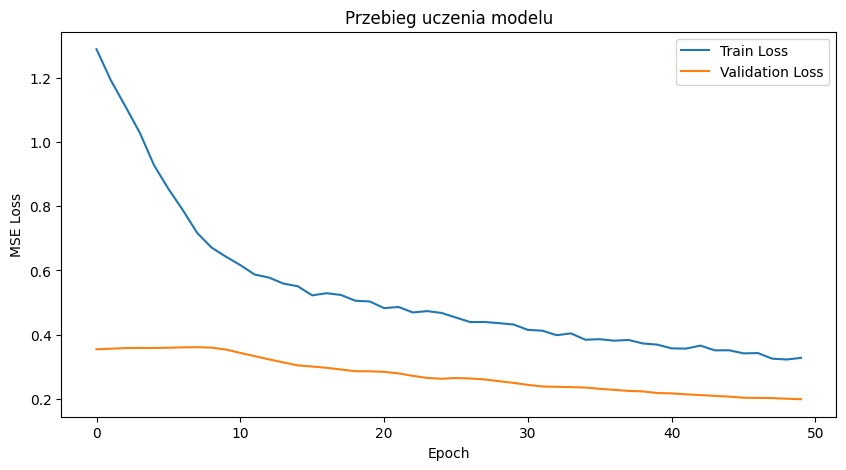

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Przebieg uczenia modelu')
plt.legend()
plt.show()

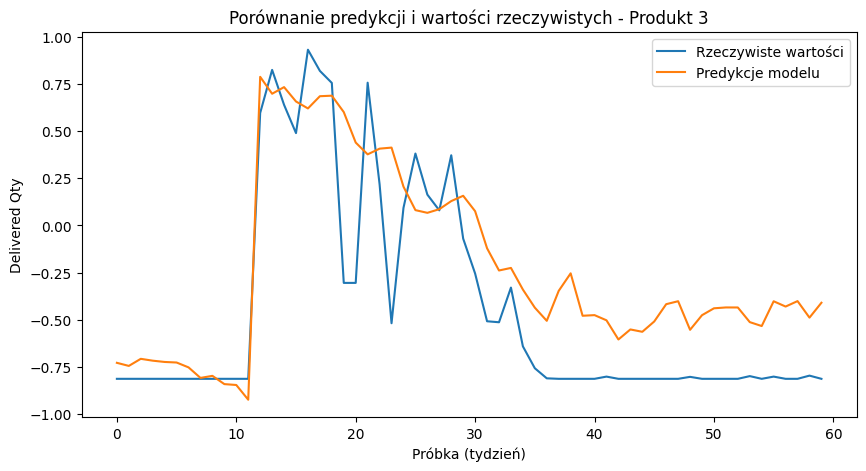

In [168]:
produkt_idx = 3

plt.figure(figsize=(10,5))
plt.plot(y_test[:, produkt_idx], label='Rzeczywiste wartości')
plt.plot(y_pred[:, produkt_idx], label='Predykcje modelu')
plt.xlabel('Próbka (tydzień)')
plt.ylabel('Delivered Qty')
plt.title(f'Porównanie predykcji i wartości rzeczywistych - Produkt {produkt_idx}')
plt.legend()
plt.show()